## CNN Compile and Train

In [2]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [3]:
data_path = '/Users/ryanlussier/ICH Detection and Classification/data/train/'

#open_file = open(image_ids, "rb")
#loaded_list = pickle.load(open_file)
#open_file.close()

#Read the pickle file
data_set1 = pd.read_pickle(data_path + 'mod_df1.pickle')
data_set2 = pd.read_pickle(data_path + 'mod_df2.pickle')
data_set = pd.concat([data_set1, data_set2])
#data_set = pd.read_pickle(data_path + 'mod_df.csv')
data_set.head()

,ID,image_array,Y_vals
0,ID_e081d0aea,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...","[1, 0, 1, 0, 0, 1]"
1,ID_5d421e995,"[[-0.9595, -0.9595, -0.9604, -0.9614, -0.9614,...","[0, 0, 0, 0, 0, 0]"
2,ID_aeee86469,"[[-0.6343, -0.6343, -0.6343, -0.6333, -0.6333,...","[0, 0, 0, 0, 0, 0]"
3,ID_76064057c,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...","[0, 0, 0, 0, 0, 0]"
4,ID_a207005ec,"[[-0.756, -0.756, -0.755, -0.755, -0.754, -0.7...","[0, 0, 0, 0, 0, 0]"


In [4]:
X = np.array(data_set.image_array.iloc[0:1200].tolist())
y = np.array(data_set.Y_vals.iloc[0:1200].tolist())

In [36]:

# the data, split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
# input image dimensions
img_rows, img_cols = 512, 512

X_train = X_train.reshape(X_train.shape[0],512,512,1)
X_test = X_test.reshape(X_test.shape[0],512,512,1)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (960, 512, 512, 1)
960 train samples
240 test samples


In [38]:
batch_size = 32
num_classes = 6
epochs = 25

model = Sequential()
model.add(Conv2D(16, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=(512,512,1)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
12/12 [==============================] - 452s 38s/step - loss: 0.6459 - accuracy: 0.2750 - val_loss: 0.4591 - val_accuracy: 0.0000e+00
Epoch 2/25
12/12 [==============================] - 481s 40s/step - loss: 0.6609 - accuracy: 0.3302 - val_loss: 0.4552 - val_accuracy: 0.0625
Epoch 3/25
12/12 [==============================] - 463s 39s/step - loss: 0.6705 - accuracy: 0.3177 - val_loss: 0.4421 - val_accuracy: 0.5500
Epoch 4/25
12/12 [==============================] - 420s 35s/step - loss: 0.6601 - accuracy: 0.3385 - val_loss: 0.4427 - val_accuracy: 0.4583
Epoch 5/25
12/12 [==============================] - 420s 35s/step - loss: 0.6599 - accuracy: 0.3135 - val_loss: 0.4604 - val_accuracy: 0.0000e+00
Epoch 6/25
12/12 [==============================] - 437s 36s/step - loss: 0.6785 - accuracy: 0.2854 - val_loss: 0.4573 - val_accuracy: 0.0417
Epoch 7/25
12/12 [==============================] - 430s 36s/step - loss: 0.6842 - accuracy: 0.2792 - val_loss: 0.4562 - val_accuracy: 0.000

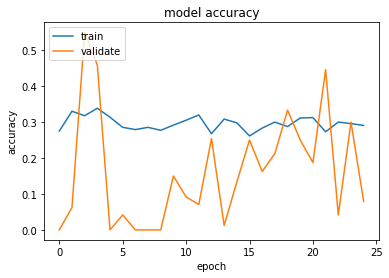

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

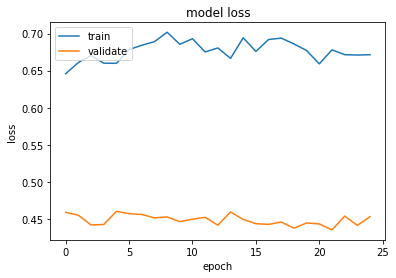

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()